<a href="https://colab.research.google.com/github/carvalheirafc/deep_learning_stuff/blob/master/statistical_analysis/diabetes/old_jupyNotebooks/diabetes_pca_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [3]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.describe()


,A,B,C,D,E,F,G,J,M,N,Diagnóstico
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,70.178819,120.894531,69.105469,20.536458,79.799479,31.992578,0.472266,33.240885,64.813119,1.348958
std,3.369578,15.006546,31.972618,19.355807,15.952218,115.244002,7.884160,0.332348,11.760232,21.843993,0.476951
min,0.000000,22.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,19.677078,1.000000
25%,1.000000,60.666667,99.000000,62.000000,0.000000,0.000000,27.300000,0.200000,24.000000,46.279601,1.000000
50%,3.000000,69.666667,117.000000,72.000000,23.000000,30.500000,32.000000,0.400000,29.000000,59.168744,1.000000
75%,6.000000,79.666667,140.250000,80.000000,32.000000,127.250000,36.600000,0.600000,41.000000,83.237983,2.000000
max,17.000000,122.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.400000,81.000000,110.527749,2.000000


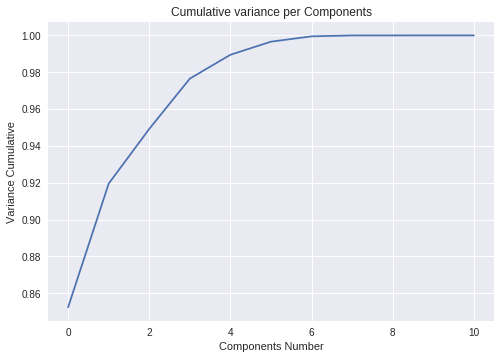

In [4]:
pca = PCA()
pca.fit(diabetes)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components Number')
plt.ylabel('Variance Cumulative')
plt.title('Cumulative variance per Components')
plt.show()

In [6]:
# Principal component Analysis
# We can use only two components to conver more than 99% of the variance values or
# Use 6 to reach up to 99.99999% of the values. 


pca = PCA(n_components = 4)

x = diabetes.loc[:, diabetes.columns !='Diagnóstico'].values
x = StandardScaler().fit_transform(x)

principalComponents = pca.fit_transform(x)

diabetes_principal_components= pd.DataFrame(data = principalComponents, columns=
                                           ['Component 1', 
                                            'Component 2', 
                                            'Component 3', 
                                            'Component 4'])


diabetes_principal_components = pd.concat([diabetes_principal_components, 
                                           diabetes[['Diagnóstico']]], axis = 1)
diabetes_principal_components.head()


,Component 1,Component 2,Component 3,Component 4,Diagnóstico
0,-1.378003,1.236053,0.411620,-0.903584,2.0
1,1.477265,-0.579780,-0.102279,-1.422971,1.0
2,-0.208237,1.749032,2.130217,-0.267261,2.0
3,1.192783,-1.299885,-1.119551,1.158302,1.0
4,-1.785973,-2.533085,2.516166,0.810150,2.0


In [0]:
diabetes_principal_components.to_csv('diabetes_pca_result.csv', index=False)